In [51]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import metrics
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [81]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)


# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)


Coefficients:  [[ -1.12463481e-01   3.00810168e-02   4.07309919e-02   2.78676719e+00
   -1.72406347e+01   4.43248784e+00  -6.23998173e-03  -1.44848504e+00
    2.62113793e-01  -1.06390978e-02  -9.16398679e-01   1.24516469e-02
   -5.09349120e-01]]

Intercepts:  [ 30.28894834]

Training Error:  10.8207870483
Testing Error:  12.1557134648


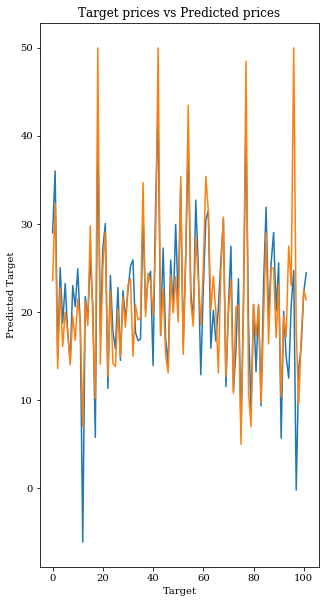

In [96]:
# SOURCES

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://matplotlib.org/api/pyplot_api.html
# https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
# http://www.bigdataexaminer.com/2016/03/31/how-to-run-linear-regression-in-python-scikit-learn/
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# functions
def sqrMean(X, Y):
    return (np.mean((X - Y) ** 2)) / 2

def getMatrix(input):
    return np.matrix(input)
    
def getVector(input):
    return np.array(input)
    
def getTranspose(input):
    return np.transpose(input)

def loss(N, features, targets, weights):
    t = getVector(targets)
    X = getMatrix(features)
    w = getVector(weights)
    partial_mean = (1/(2*N))
    #Xw = linalg.matmul(X, w)
    Xw = linalg.dot(X, w)
    offset = np.subtract(t, Xw)
    #return partial_mean * linalg.matmul(getTranspose(offset), offset)
    return partial_mean * linalg.dot(getTranspose(offset), offset)

# Task 1-1: use linear regression in sklearn

# creating linear regression model object with default parameters
model = linear_model.LinearRegression()

# fitting model with training X,Y data. We are training the model with the training data at this time
model.fit(train_data, train_target)

# Task 1-2: show intercept and coefficents
print()
print('Coefficients: ', model.coef_)
print()
print('Intercepts: ', model.intercept_)

# Here we are getting a prediction 
trained_results = model.predict(train_data)

# Here we are getting a prediction 
tested_results = model.predict(test_data)

# get error value from both data sets 
#train_error = metrics.mean_squared_error(train_target, results)
#test_error = metrics.mean_squared_error(test_target, results)
train_error = sqrMean(train_target, trained_results)
test_error = sqrMean(test_target, tested_results)

# Task 1-3: show errors on training dataset and testing dataset
print()
print('Training Error: ', train_error)
print('Testing Error: ', test_error)

# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
plt.xlabel("Target")
plt.ylabel("Predicted Target")
plt.title("Target prices vs Predicted prices")
# plt.plot(test_target, test_target, 'r--', tested_results, tested_results, 'bs')
#plt.plot(np.matrix(test_data), model.predict(np.matrix(test_data)))
# plt.plot(model.predict(np.matrix(test_data)))
# plt.plot(np.matrix(test_data))
plt.plot(model.predict(np.matrix(test_data)))
plt.plot(np.matrix(test_target))
# plt.scatter(test_target, tested_results,  color='black')
#plt.xticks(())
#plt.yticks(())
plt.show()

In [ ]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and training label
# Output: Weights
def myNormalEqualFun(X,y):
    return 
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)


# Task 2-3: show intercept and coefficents


# Task 2-4: show errors on training dataset and testing dataset


# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset

In [ ]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
    return 

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w = myGradientDescentFun(train_data_intercept,train_target,0,0)

# Task 3-3: show intercept and coefficents


# Task 3-4: show errors on training dataset and testing dataset


# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset